# Data Understanding

In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 26.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from rdkit import Chem

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

load_path_train = '/content/gdrive/MyDrive/ID2214/training_smiles.csv'

train_df = pd.read_csv(load_path_train)
train_df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,INDEX,SMILES,ACTIVE
0,1,CCCc1sc(N)nc1-c1ccc(C)cc1,0.0
1,2,CCCCNC(=O)Cn1cnc2c(cnn2-c2ccc(C)c(C)c2)c1=O,0.0
2,3,O=C(NCCC1=CCCCC1)C1CCN(S(=O)(=O)N2CCOCC2)CC1,0.0
3,4,N#Cc1c(-c2c(Cl)cccc2Cl)noc1/C=C/Nc1ccc(C(=O)O)cc1,0.0
4,5,Cc1cc(C)cc(OCC(=O)Nc2ccc(F)cc2)c1,0.0
...,...,...,...
153225,153226,O=C(COC(=O)Cc1ccsc1)NC1CCCCCC1,0.0
153226,153227,CCCCCCN(C(=O)CCCCCN1C(=O)NC(c2cccc([N+](=O)[O-...,0.0
153227,153228,O=C(Cn1cnc([N+](=O)[O-])c1)NCc1ccc(F)cc1,0.0
153228,153229,CCOC(=O)CS(=O)(=O)CC(=O)Nc1ccc([N+](=O)[O-])cc1OC,0.0


In [ ]:
# test_df = pd.read_csv("test_smiles.csv")
# test_df

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153230 entries, 0 to 153229
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   INDEX   153230 non-null  int64  
 1   SMILES  153230 non-null  object 
 2   ACTIVE  153230 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ MB


In [10]:
train_df.describe()

,INDEX,ACTIVE
count,153230.000000,153230.000000
mean,76615.500000,0.011643
std,44233.835211,0.107271
min,1.000000,0.000000
25%,38308.250000,0.000000
50%,76615.500000,0.000000
75%,114922.750000,0.000000
max,153230.000000,1.000000


In [11]:

# Example of converting SMILES to a molecule object
example_smiles = 'CCCc1sc(N)nc1-c1ccc(C)cc1'
example_molecule = Chem.MolFromSmiles(example_smiles)

# Get the number of atoms in the molecule
num_atoms = example_molecule.GetNumAtoms()
print(f"Number of atoms: {num_atoms}")

Number of atoms: 16


count    153230.000000
mean          0.011643
std           0.107271
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ACTIVE, dtype: float64


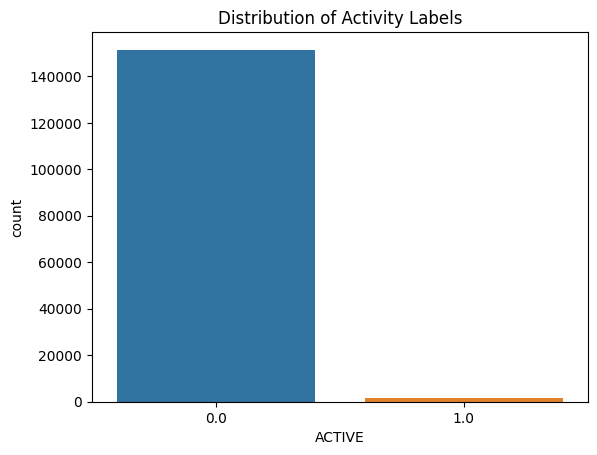

In [13]:
# Display basic statistics of the 'ACTIVE' column
print(train_df['ACTIVE'].describe())

# Visualize the distribution of activity labels
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='ACTIVE', data=train_df)
plt.title('Distribution of Activity Labels')
plt.show()

In [14]:
train_df['ACTIVE'].value_counts()

0.0    151446
1.0      1784
Name: ACTIVE, dtype: int64

# Data Preprocessing

In [15]:
# Example: Convert SMILES to a molecule object
train_df['MOLECULE'] = train_df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

[03:23:14] WARNING: not removing hydrogen atom without neighbors


In [16]:
train_df

,INDEX,SMILES,ACTIVE,MOLECULE
0,1,CCCc1sc(N)nc1-c1ccc(C)cc1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef5be5000>
1,2,CCCCNC(=O)Cn1cnc2c(cnn2-c2ccc(C)c(C)c2)c1=O,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef5b44510>
2,3,O=C(NCCC1=CCCCC1)C1CCN(S(=O)(=O)N2CCOCC2)CC1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef5b445f0>
3,4,N#Cc1c(-c2c(Cl)cccc2Cl)noc1/C=C/Nc1ccc(C(=O)O)cc1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef5b44660>
4,5,Cc1cc(C)cc(OCC(=O)Nc2ccc(F)cc2)c1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef5b447b0>
...,...,...,...,...
153225,153226,O=C(COC(=O)Cc1ccsc1)NC1CCCCCC1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef3d76d50>
153226,153227,CCCCCCN(C(=O)CCCCCN1C(=O)NC(c2cccc([N+](=O)[O-...,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef3d76dc0>
153227,153228,O=C(Cn1cnc([N+](=O)[O-])c1)NCc1ccc(F)cc1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef3d76e30>
153228,153229,CCOC(=O)CS(=O)(=O)CC(=O)Nc1ccc([N+](=O)[O-])cc1OC,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef3d76ea0>


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153230 entries, 0 to 153229
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   INDEX     153230 non-null  int64  
 1   SMILES    153230 non-null  object 
 2   ACTIVE    153230 non-null  float64
 3   MOLECULE  153230 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 4.7+ MB


In [18]:
from rdkit.Chem import rdMolDescriptors, Fragments, Lipinski, AllChem

# Example: Calculate molecular weight using rdMolDescriptors
train_df['MOL_WEIGHT'] = train_df['MOLECULE'].apply(lambda x: rdMolDescriptors.CalcExactMolWt(x))

# Example: Calculate number of heavy atoms using Lipinski
train_df['HEAVY_ATOM_COUNT'] = train_df['MOLECULE'].apply(lambda x: Lipinski.HeavyAtomCount(x))

# Example: Generate Morgan fingerprints
# train_df['MORGAN_FP'] = train_df['MOLECULE'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024))

# TODO: breakdown fingerprints vector to numberic feature groups



In [19]:
train_df

,INDEX,SMILES,ACTIVE,MOLECULE,MOL_WEIGHT,HEAVY_ATOM_COUNT
0,1,CCCc1sc(N)nc1-c1ccc(C)cc1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef5be5000>,232.103420,16
1,2,CCCCNC(=O)Cn1cnc2c(cnn2-c2ccc(C)c(C)c2)c1=O,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef5b44510>,353.185175,26
2,3,O=C(NCCC1=CCCCC1)C1CCN(S(=O)(=O)N2CCOCC2)CC1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef5b445f0>,385.203527,26
3,4,N#Cc1c(-c2c(Cl)cccc2Cl)noc1/C=C/Nc1ccc(C(=O)O)cc1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef5b44660>,399.017747,27
4,5,Cc1cc(C)cc(OCC(=O)Nc2ccc(F)cc2)c1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef5b447b0>,273.116507,20
...,...,...,...,...,...,...
153225,153226,O=C(COC(=O)Cc1ccsc1)NC1CCCCCC1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef3d76d50>,295.124215,20
153226,153227,CCCCCCN(C(=O)CCCCCN1C(=O)NC(c2cccc([N+](=O)[O-...,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef3d76dc0>,899.431672,65
153227,153228,O=C(Cn1cnc([N+](=O)[O-])c1)NCc1ccc(F)cc1,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef3d76e30>,278.081518,20
153228,153229,CCOC(=O)CS(=O)(=O)CC(=O)Nc1ccc([N+](=O)[O-])cc1OC,0.0,<rdkit.Chem.rdchem.Mol object at 0x7f9ef3d76ea0>,360.062736,24


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153230 entries, 0 to 153229
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   INDEX             153230 non-null  int64  
 1   SMILES            153230 non-null  object 
 2   ACTIVE            153230 non-null  float64
 3   MOLECULE          153230 non-null  object 
 4   MOL_WEIGHT        153230 non-null  float64
 5   HEAVY_ATOM_COUNT  153230 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 7.0+ MB


In [21]:
train_df.describe()

,INDEX,ACTIVE,MOL_WEIGHT,HEAVY_ATOM_COUNT
count,153230.000000,153230.000000,153230.000000,153230.000000
mean,76615.500000,0.011643,349.270902,24.414083
std,44233.835211,0.107271,80.700601,5.724021
min,1.000000,0.000000,32.026215,2.000000
25%,38308.250000,0.000000,295.031599,21.000000
50%,76615.500000,0.000000,345.147727,24.000000
75%,114922.750000,0.000000,400.140994,28.000000
max,153230.000000,1.000000,1766.302831,117.000000


# Feature Engineering

In [22]:
# Example: Experiment with additional molecular descriptors
train_df['NUM_RINGS'] = train_df['MOLECULE'].apply(lambda x: rdMolDescriptors.CalcNumRings(x))

# TODO: search the library to find more potential feature groups

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Example: Normalize a specific feature using Min-Max scaling
scaler = MinMaxScaler()
train_df['MOL_WEIGHT_NORMALIZED'] = scaler.fit_transform(train_df[['MOL_WEIGHT']])

In [24]:
train_df.describe()

# TODO: drop columns after normalization

,INDEX,ACTIVE,MOL_WEIGHT,HEAVY_ATOM_COUNT,NUM_RINGS,MOL_WEIGHT_NORMALIZED
count,153230.000000,153230.000000,153230.000000,153230.000000,153230.000000,153230.000000
mean,76615.500000,0.011643,349.270902,24.414083,2.951145,0.182926
std,44233.835211,0.107271,80.700601,5.724021,1.049867,0.046533
min,1.000000,0.000000,32.026215,2.000000,0.000000,0.000000
25%,38308.250000,0.000000,295.031599,21.000000,2.000000,0.151651
50%,76615.500000,0.000000,345.147727,24.000000,3.000000,0.180549
75%,114922.750000,0.000000,400.140994,28.000000,4.000000,0.212258
max,153230.000000,1.000000,1766.302831,117.000000,21.000000,1.000000


In [25]:
# TODO: feature selection, using for example Pearson correlation coefficient

# Choose Learning Algorithms

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [26]:
from sklearn.model_selection import train_test_split

X = train_df[['MOL_WEIGHT_NORMALIZED', 'HEAVY_ATOM_COUNT', 'NUM_RINGS']]
y = train_df['ACTIVE']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: Tune hyperparameters for Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, scoring='roc_auc', cv=3)
rf_grid.fit(X_train, y_train)

# Get the best hyperparameters
best_rf_params = rf_grid.best_params_

In [ ]:
rf_model = RandomForestClassifier(n_estimators=best_rf_params['n_estimators'], max_depth=best_rf_params['max_depth'])
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [ ]:
from sklearn.metrics import roc_auc_score

# Example: Evaluate Random Forest on the validation set
y_val_pred_rf = rf_model.predict_proba(X_val)[:, 1]
auc_rf = roc_auc_score(y_val, y_val_pred_rf)

# Model Training

In [49]:
# Use the full training set for model training
X_train_full = train_df[['MOL_WEIGHT_NORMALIZED', 'HEAVY_ATOM_COUNT', 'NUM_RINGS']]
y_train_full = train_df['ACTIVE']

In [ ]:
# Example: Train Random Forest with the best-tuned hyperparameters using the full training set
rf_model_full = RandomForestClassifier(n_estimators=best_rf_params['n_estimators'], max_depth=best_rf_params['max_depth'])
rf_model_full.fit(X_train_full, y_train_full)

In [ ]:
# Example: Evaluate Random Forest on the validation set
y_val_pred_rf_full = rf_model_full.predict_proba(X_val)[:, 1]
auc_rf_full = roc_auc_score(y_val, y_val_pred_rf_full)

In [ ]:
import joblib

# Save the model to Google Drive
model_path = '/content/gdrive/MyDrive/ID2214/{}'.format('random_forest_model.pkl')
joblib.dump(rf_model_full, model_path)

# Print the path where the model is saved
print('Model saved to:', model_path)

# Model Evaluation

In [28]:
import joblib
from sklearn.metrics import roc_auc_score

load_path_model = '/content/gdrive/MyDrive/ID2214/random_forest_model.pkl'
rf_model = joblib.load(load_path_model)

# Example: Evaluate Random Forest on the validation set
y_val_pred_rf = rf_model.predict_proba(X_val)[:, 1]
auc_rf = roc_auc_score(y_val, y_val_pred_rf)

In [29]:
print(f"Random Forest AUC: {auc_rf}")

Random Forest AUC: 0.8076568455071658


In [ ]:
# TODO:
# Example: Select the model with the highest AUC
best_model = rf_model if auc_rf > auc_other_model else other_model

In [ ]:
# TODO:
# Example: Fine-tune Random Forest further
rf_model_final = RandomForestClassifier(n_estimators=new_n_estimators, max_depth=new_max_depth)
rf_model_final.fit(X_train_full, y_train_full)

# Model Testing

In [37]:
# Load the test set into a DataFrame
load_path_test = '/content/gdrive/MyDrive/ID2214/test_smiles.csv'

test_df = pd.read_csv(load_path_test)

In [38]:
# Convert SMILES to molecules
test_df['MOLECULE'] = test_df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))

# Extract relevant features
test_df['MOL_WEIGHT'] = test_df['MOLECULE'].apply(lambda x: rdMolDescriptors.CalcExactMolWt(x))

test_df['HEAVY_ATOM_COUNT'] = test_df['MOLECULE'].apply(lambda x: Lipinski.HeavyAtomCount(x))

test_df['NUM_RINGS'] = test_df['MOLECULE'].apply(lambda x: rdMolDescriptors.CalcNumRings(x))

scaler = MinMaxScaler()
test_df['MOL_WEIGHT_NORMALIZED'] = scaler.fit_transform(test_df[['MOL_WEIGHT']])

# TODO:
# Add additional feature extraction steps as needed

[03:32:28] WARNING: not removing hydrogen atom without neighbors


In [39]:
test_df

,INDEX,SMILES,MOLECULE,MOL_WEIGHT,HEAVY_ATOM_COUNT,NUM_RINGS,MOL_WEIGHT_NORMALIZED
0,153231,O=C(N/N=C\c1cccc(Br)c1)c1ccccc1-n1cccc1,<rdkit.Chem.rdchem.Mol object at 0x7f9eed43a1f0>,367.032024,23,3,0.185666
1,153232,CCOc1ccc(/C=N/NC(=O)c2nnn(-c3nonc3N)c2COc2ccc(...,<rdkit.Chem.rdchem.Mol object at 0x7f9eed43a260>,466.151329,34,4,0.245218
2,153233,Cc1cc2nc(Cl)c(Cl)nc2cc1C,<rdkit.Chem.rdchem.Mol object at 0x7f9eed43a2d0>,226.006454,14,2,0.100937
3,153234,O=C1NC(=S)N/C1=C/c1cc([N+](=O)[O-])ccc1N1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x7f9eed43a340>,334.073576,23,3,0.165864
4,153235,Cc1c(C(=O)OCC(=O)C(C#N)=C2Nc3ccccc3N2)oc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x7f9eed43a3b0>,373.106256,28,4,0.189316
...,...,...,...,...,...,...,...
51071,204302,CCOc1ccc(-c2c[n+](=O)c3c(n2[O-])CCCC3)c(OCC)c1,<rdkit.Chem.rdchem.Mol object at 0x7f9eed3c2f10>,330.157957,24,3,0.163512
51072,204303,COc1nc(C)nc2c1ccc1ccccc12,<rdkit.Chem.rdchem.Mol object at 0x7f9eed3c2f80>,224.094963,17,3,0.099788
51073,204304,COc1cccc(-c2ccc(SCC(=O)NCCc3ccccc3)nn2)c1,<rdkit.Chem.rdchem.Mol object at 0x7f9eed3c2ff0>,379.135448,27,3,0.192938
51074,204305,CSc1nc2ccccn2c(=O)c1C#N,<rdkit.Chem.rdchem.Mol object at 0x7f9eed3c3060>,217.030983,15,2,0.095544


In [42]:
# Example: Predict labels for the test set using the selected model
X_test = test_df[['MOL_WEIGHT_NORMALIZED', 'HEAVY_ATOM_COUNT', 'NUM_RINGS']]
# Example, rf is the best
test_df['PREDICTED_LABEL'] = rf_model.predict_proba(X_test)[:, 1]

In [43]:
import joblib

# Save the predictions to a CSV file
predictions_path = '/content/gdrive/MyDrive/ID2214/{}'.format('test_predictions.csv')
test_df[['INDEX', 'PREDICTED_LABEL']].to_csv(predictions_path, index=False)

# Print the path where the CSV file is saved
print('Model saved to:', predictions_path)

Model saved to: /content/gdrive/MyDrive/ID2214/test_predictions.csv


# Estimate AUC

In [50]:
from sklearn.model_selection import cross_val_score

# Example: Cross-validation for Random Forest AUC on the training set
# Example, rf is the best
cv_auc_scores = cross_val_score(rf_model, X_train_full, y_train_full, cv=5, scoring='roc_auc')
estimated_train_auc = cv_auc_scores.mean()

In [54]:
X_test = test_df[['MOL_WEIGHT_NORMALIZED', 'HEAVY_ATOM_COUNT', 'NUM_RINGS']]
# Example, rf is the best
test_df['PREDICTED_LABEL'] = rf_model.predict_proba(X_test)[:, 1]

In [55]:
test_df

,INDEX,SMILES,MOLECULE,MOL_WEIGHT,HEAVY_ATOM_COUNT,NUM_RINGS,MOL_WEIGHT_NORMALIZED,PREDICTED_LABEL
0,153231,O=C(N/N=C\c1cccc(Br)c1)c1ccccc1-n1cccc1,<rdkit.Chem.rdchem.Mol object at 0x7f9eed43a1f0>,367.032024,23,3,0.185666,0.009842
1,153232,CCOc1ccc(/C=N/NC(=O)c2nnn(-c3nonc3N)c2COc2ccc(...,<rdkit.Chem.rdchem.Mol object at 0x7f9eed43a260>,466.151329,34,4,0.245218,0.011914
2,153233,Cc1cc2nc(Cl)c(Cl)nc2cc1C,<rdkit.Chem.rdchem.Mol object at 0x7f9eed43a2d0>,226.006454,14,2,0.100937,0.005496
3,153234,O=C1NC(=S)N/C1=C/c1cc([N+](=O)[O-])ccc1N1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x7f9eed43a340>,334.073576,23,3,0.165864,0.010323
4,153235,Cc1c(C(=O)OCC(=O)C(C#N)=C2Nc3ccccc3N2)oc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x7f9eed43a3b0>,373.106256,28,4,0.189316,0.023917
...,...,...,...,...,...,...,...,...
51071,204302,CCOc1ccc(-c2c[n+](=O)c3c(n2[O-])CCCC3)c(OCC)c1,<rdkit.Chem.rdchem.Mol object at 0x7f9eed3c2f10>,330.157957,24,3,0.163512,0.012276
51072,204303,COc1nc(C)nc2c1ccc1ccccc12,<rdkit.Chem.rdchem.Mol object at 0x7f9eed3c2f80>,224.094963,17,3,0.099788,0.174421
51073,204304,COc1cccc(-c2ccc(SCC(=O)NCCc3ccccc3)nn2)c1,<rdkit.Chem.rdchem.Mol object at 0x7f9eed3c2ff0>,379.135448,27,3,0.192938,0.009427
51074,204305,CSc1nc2ccccn2c(=O)c1C#N,<rdkit.Chem.rdchem.Mol object at 0x7f9eed3c3060>,217.030983,15,2,0.095544,0.013919


In [56]:
test_df.describe()

,INDEX,MOL_WEIGHT,HEAVY_ATOM_COUNT,NUM_RINGS,MOL_WEIGHT_NORMALIZED,PREDICTED_LABEL
count,51076.000000,51076.000000,51076.000000,51076.000000,51076.000000,51076.000000
mean,178768.500000,349.177953,24.409586,2.951758,0.174939,0.017102
std,14744.515511,80.317159,5.696362,1.051481,0.048255,0.026596
min,153231.000000,58.005479,1.000000,0.000000,0.000000,0.000076
25%,165999.750000,295.044919,21.000000,2.000000,0.142416,0.008428
50%,178768.500000,345.114712,24.000000,3.000000,0.172498,0.010962
75%,191537.250000,400.066382,28.000000,4.000000,0.205514,0.015470
max,204306.000000,1722.425568,122.000000,22.000000,1.000000,0.607066
